In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
# import csv file
df = pd.read_csv(r"C:\Sharayu Portfolio\Sharayu Project\Online Store Sales Analysis\Online Store Purchases.csv", encoding= 'unicode_escape')

In [4]:
df.shape

(3900, 18)

In [6]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
#Check for null values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
#check for duplicates
df.duplicated().sum()

0

In [17]:
#check for unique values in each column
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [21]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [23]:
df['Purchase Amount (USD)'].dtypes

dtype('int64')

In [24]:
# use describe() for specific columns
df[['Age', 'Purchase Amount (USD)']].describe()

,Age,Purchase Amount (USD)
count,3900.000000,3900.000000
mean,44.068462,59.764359
std,15.207589,23.685392
min,18.000000,20.000000
25%,31.000000,39.000000
50%,44.000000,60.000000
75%,57.000000,81.000000
max,70.000000,100.000000


# Visualizations

## Number of Customers by Gender

Text(0, 0.5, 'Number of Customers')

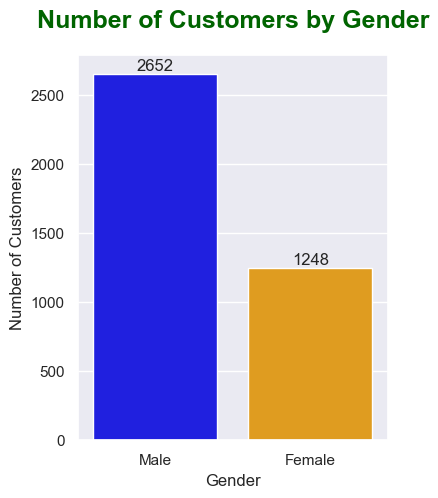

In [147]:
# plotting a bar chart for Gender and it's count

v1 = sns.countplot(x = 'Gender',data = df, palette=['blue', 'orange'])

sns.set(rc={'figure.figsize':(4,5)})


for bars in v1.containers:
    v1.bar_label(bars)
    
# Add a title to the chart
v1.set_title('Number of Customers by Gender', fontweight='bold', color='darkgreen', fontsize=18, pad=20)

# Add axis labels
v1.set_xlabel('Gender')
v1.set_ylabel('Number of Customers')

### Number of male customers are higher than number of female customers

## Sales by Product Category

In [151]:
Category_count = df["Category"].value_counts()
Category_count.head()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

Text(0.5, 1.0, 'Sales by Product Category')

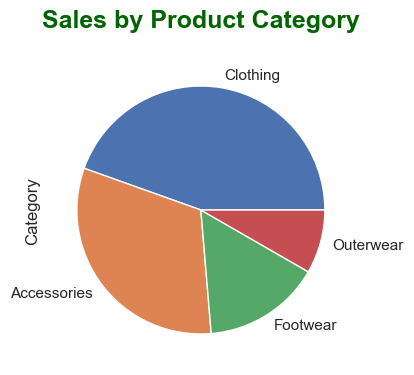

In [61]:
v2 = Category_count.plot(kind = "pie")

v2.set_title('Sales by Product Category', fontweight='bold', color='darkgreen', fontsize=18, pad=20)

### The 'Clothing' category has highest number of purchases and the 'Outerwear' category has lowest number of purchases

## Top 30 States with Highest Number of Customers

Text(0, 0.5, 'Number of Customers')

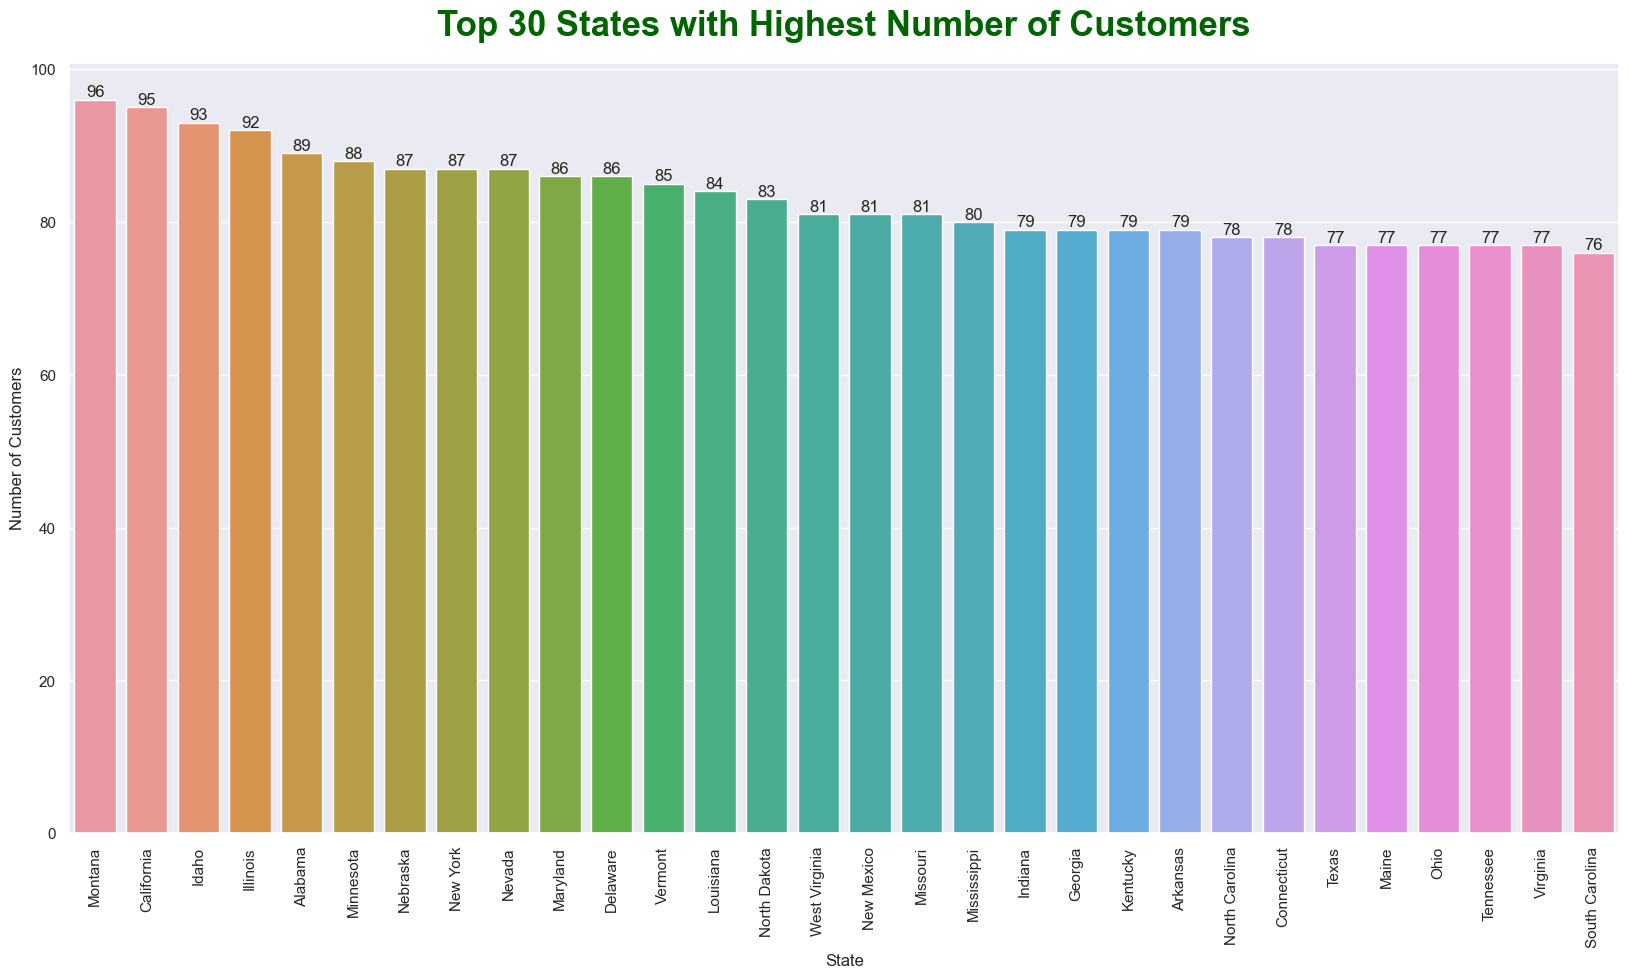

In [125]:
#Top 10 states with highest number of purchases
top_locations = df['Location'].value_counts().sort_values(ascending=False).head(30)



v3 = sns.countplot(x='Location', data=df, order=top_locations.index)
plt.xticks(rotation=90)  # Rotate x-labels for better readability
for bars in v3.containers:
    v3.bar_label(bars)
    
sns.set(rc={'figure.figsize':(20,7)})

# Add a title to the chart
v3.set_title('Top 30 States with Highest Number of Customers', fontweight='bold', color='darkgreen', fontsize=25, pad=20)

# Add axis labels
v3.set_xlabel('State')
v3.set_ylabel('Number of Customers')
    


## Average Purchase Amount Distribution for top 30 States

Text(0, 0.5, 'Average Purchse Amount')

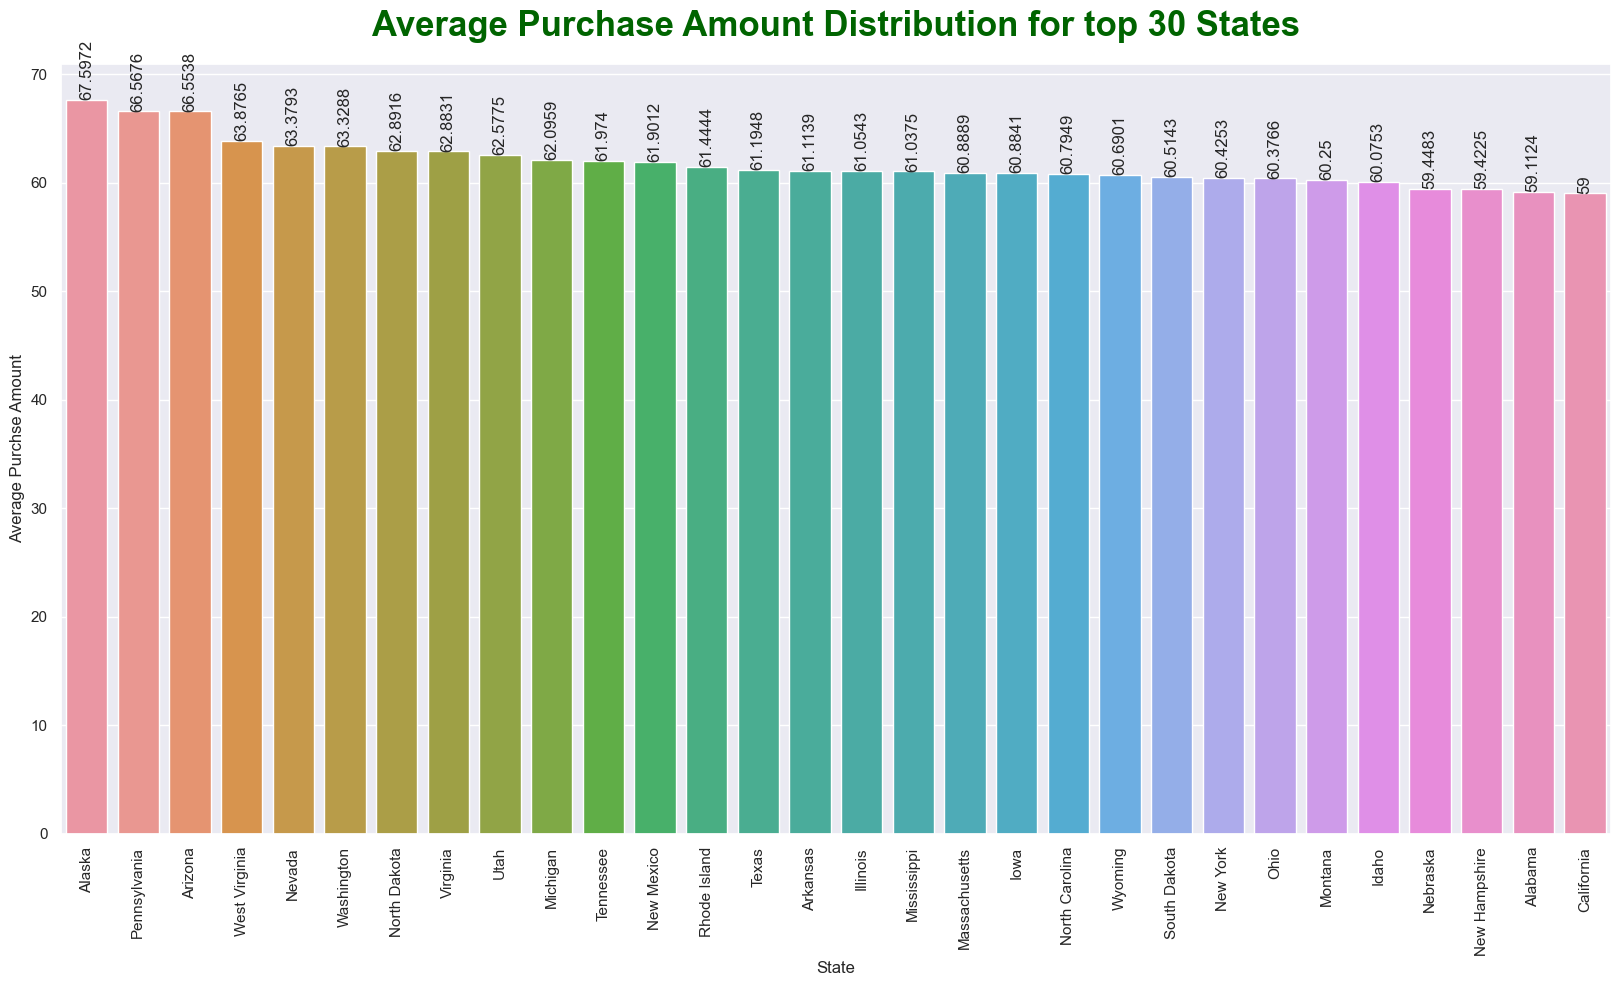

In [124]:
Average_purchase = df.groupby(['Location'], as_index=False)['Purchase Amount (USD)'].mean().sort_values(by='Purchase Amount (USD)', ascending=False).head(30)

sns.set(rc={'figure.figsize':(20,10)})
v4 = sns.barplot(data = Average_purchase, x = 'Location',y= 'Purchase Amount (USD)')

plt.xticks(rotation=90)  # Rotate x-labels for better readability
for bars in v4.containers:
    v4.bar_label(bars, rotation=90)
    
# Add a title to the chart
v4.set_title('Average Purchase Amount Distribution for top 30 States', fontweight='bold', color='darkgreen', fontsize=25, pad=20)

# Add axis labels
v4.set_xlabel('State')
v4.set_ylabel('Average Purchse Amount')

## Subscription Status of the Customers

<AxesSubplot:ylabel='Subscription Status'>

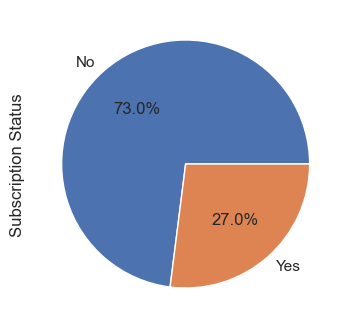

In [145]:
subscription_type = df["Subscription Status"].value_counts()
subscription_type.plot(kind = "pie",  autopct = '%.1f%%')

### 27% of customers are subscribed and 73% of customers are not subscribed

Text(0, 0.5, 'Number of customers')

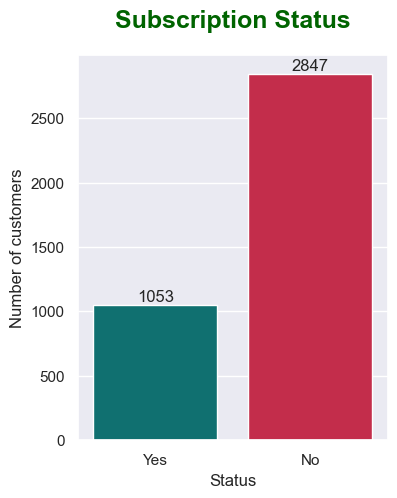

In [142]:
v5 = sns.countplot(x = 'Subscription Status',data = df, palette=['teal', 'crimson'])

sns.set(rc={'figure.figsize':(4,5)})


for bars in v5.containers:
    v5.bar_label(bars)
    
# Add a title to the chart
v5.set_title('Subscription Status', fontweight='bold', color='darkgreen', fontsize=18, pad=20)

# Add axis labels
v5.set_xlabel('Status')
v5.set_ylabel('Number of customers')

### Out of 3900 customers, 1053 customers are subscribed and 2847 of customers are not subscribed

Text(0, 0.5, 'Average Purchse Amount')

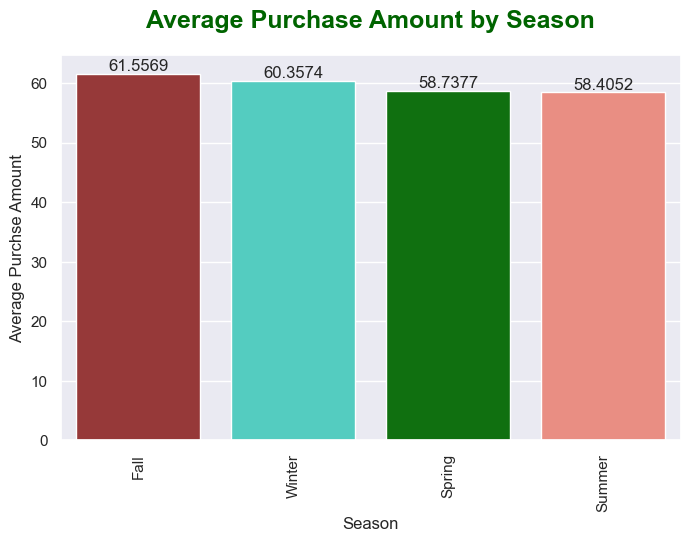

In [172]:
Average_purchase = df.groupby(['Season'], as_index=False)['Purchase Amount (USD)'].mean().sort_values(by='Purchase Amount (USD)', ascending=False)

sns.set(rc={'figure.figsize':(8,5)})
v6 = sns.barplot(data = Average_purchase, x = 'Season',y= 'Purchase Amount (USD)', palette=['brown', 'turquoise', 'green', 'salmon'])

plt.xticks(rotation=90)  # Rotate x-labels for better readability
for bars in v6.containers:
    v6.bar_label(bars)
    
# Add a title to the chart
v6.set_title('Average Purchase Amount by Season', fontweight='bold', color='darkgreen', fontsize=18, pad=20)

# Add axis labels
v6.set_xlabel('Season')
v6.set_ylabel('Average Purchse Amount')

## Number of Purchases with Disount

Text(0, 0.5, 'Number of Purchases')

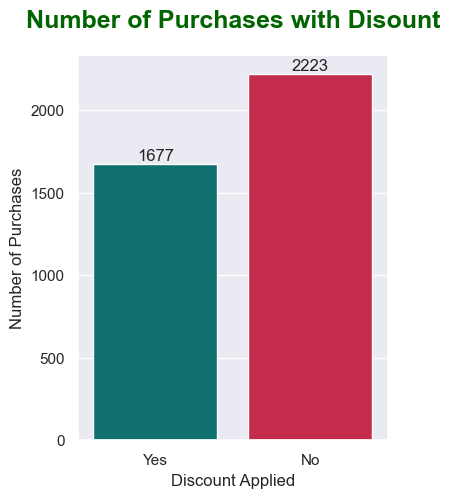

In [170]:
v7 = sns.countplot(x = 'Discount Applied',data = df, palette=['teal', 'crimson'])

sns.set(rc={'figure.figsize':(4,5)})


for bars in v7.containers:
    v7.bar_label(bars)
    
# Add a title to the chart
v7.set_title('Number of Purchases with Disount', fontweight='bold', color='darkgreen', fontsize=18, pad=20)

# Add axis labels
v7.set_xlabel('Discount Applied')
v7.set_ylabel('Number of Purchases')

## Number of Purchases using Promo Code

Text(0, 0.5, 'Number of Purchases')

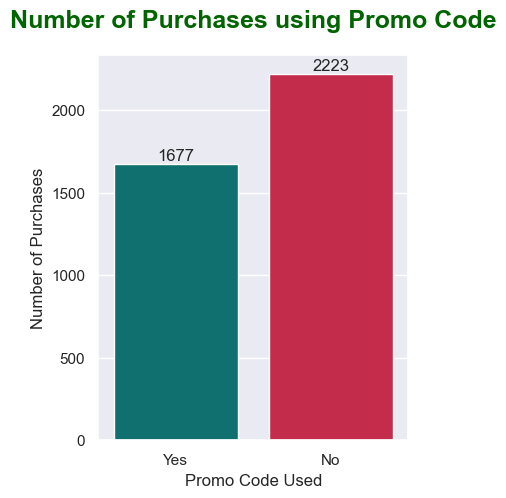

In [171]:
v8 = sns.countplot(x = 'Promo Code Used',data = df, palette=['teal', 'crimson'])

sns.set(rc={'figure.figsize':(4,5)})


for bars in v8.containers:
    v8.bar_label(bars)
    
# Add a title to the chart
v8.set_title('Number of Purchases using Promo Code', fontweight='bold', color='darkgreen', fontsize=18, pad=20)

# Add axis labels
v8.set_xlabel('Promo Code Used')
v8.set_ylabel('Number of Purchases')